Change root directory

In [24]:
import os
os.chdir('/home/iaapp/brayan/helmholtzSim')
print(os.getcwd())

/home/iaapp/brayan/helmholtzSim


Import libraries

In [25]:
import time
import numpy as np
import pandas as pd
from src import helmCoils_simulator as sim
from src import plotMagneticField as hplot
from src import helmCoils_optmizer as opt


Initial square spire Simulation in X-Axis

In [26]:
number_of_spires = 4
size_length =  0.72
distance_among_spires = 0.46
turns = 30
current = 1 
rotation_matrix = np.eye(3)
X_coil = sim.CoilParameters(number_of_spires, size_length, distance_among_spires, turns, current, rotation_matrix)

# Simulation settings
parallel_coils = 150
batch_Size = 120
#grid_length_size = 0.01 #Space among evaluation points
grid_length_size = 0.1
num_seg = 100           #Numer of segments 

In [27]:
##Spawn spires
spires_x_sq = X_coil.square_spires(num_seg)

In [28]:
f0 = None
f0 = hplot.plot_spires(f0, spires_x_sq, color='black', row=None, col=None)

# Plot the square spires
f0.show()

In [29]:
X, Y, Z = sim.generate_range([-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5], step_size_x = grid_length_size)

hplot.plot_grid(X, Y, Z, f0)

Optimization Problem

In [ ]:
# Make sure that Ax, X, Y, Z, and test_3 functions are properly defined in your environment.
optimizer = opt.HelmholtzOptimizer(
    desired_size = 0.30,          # 30e-2 is 0.30 m
    coil = X_coil,
    fun = X_coil.square_spires,
    #fun = X_coil.circular_spires,
    fix_L=False,
    fixed_L_value=2.0,          # Set a fixed value for L if needed
    grid_length_size=grid_length_size,
    population = 20,
    generations = 100,
    mutation = 0.8
)
optimizer.optimize()

In [30]:
#X_coil.update_parameters(length=1.05 ,distance=0.59)
X_coil.update_parameters(length=0.65, distance=0.33)
print(X_coil.L)
##Spawn spires
spires_x_sq = X_coil.square_spires(num_seg)
f1 = None
f1 = hplot.plot_spires(f1, spires_x_sq, color='black', row=None, col=None)

# Plot the square spires
f1.show()

[0.65 0.65 0.65 0.65]


In [31]:
# Generar grid
#X, Y, Z = sim.generate_range([-1.5*(np.sum(X_coil.h)/2), 1.5*(np.sum(X_coil.h)/2)], step_size_x = grid_length_size)

hplot.plot_grid(X, Y, Z, f0)

In [32]:
X_coil.update_parameters(current=1)


In [33]:
#Run simulations
start_time = time.time() #Count start time
#x_coil_results_s = sim.coil_simulation_parallel(X, Y, Z, X_coil, spires_x_sq, batch_Size, enable_progress_bar=True, n=parallel_coils)
x_coil_results_s = sim.coil_symetric_simulation(X, Y, Z, X_coil, spires_x_sq, batch_Size, enable_progress_bar=True, n=parallel_coils)
end_time = time.time()   #Mark ending time

# Calcular la norma del campo magnético B = sqrt(Bx^2 + By^2 + Bz^2)
x_coil_results_s["B_norm"] = np.sqrt(x_coil_results_s["Bx"]**2 + x_coil_results_s["By"]**2 + x_coil_results_s["Bz"]**2)

#Calculate and show the simulation time
execution_time = end_time - start_time
print(f'Simulation finished in {execution_time/60} minutes...')

Simulation Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Simulation Progress: 100%|██████████| 3/3 [00:08<00:00,  2.73s/it]

Simulation finished in 0.13728275299072265 minutes...


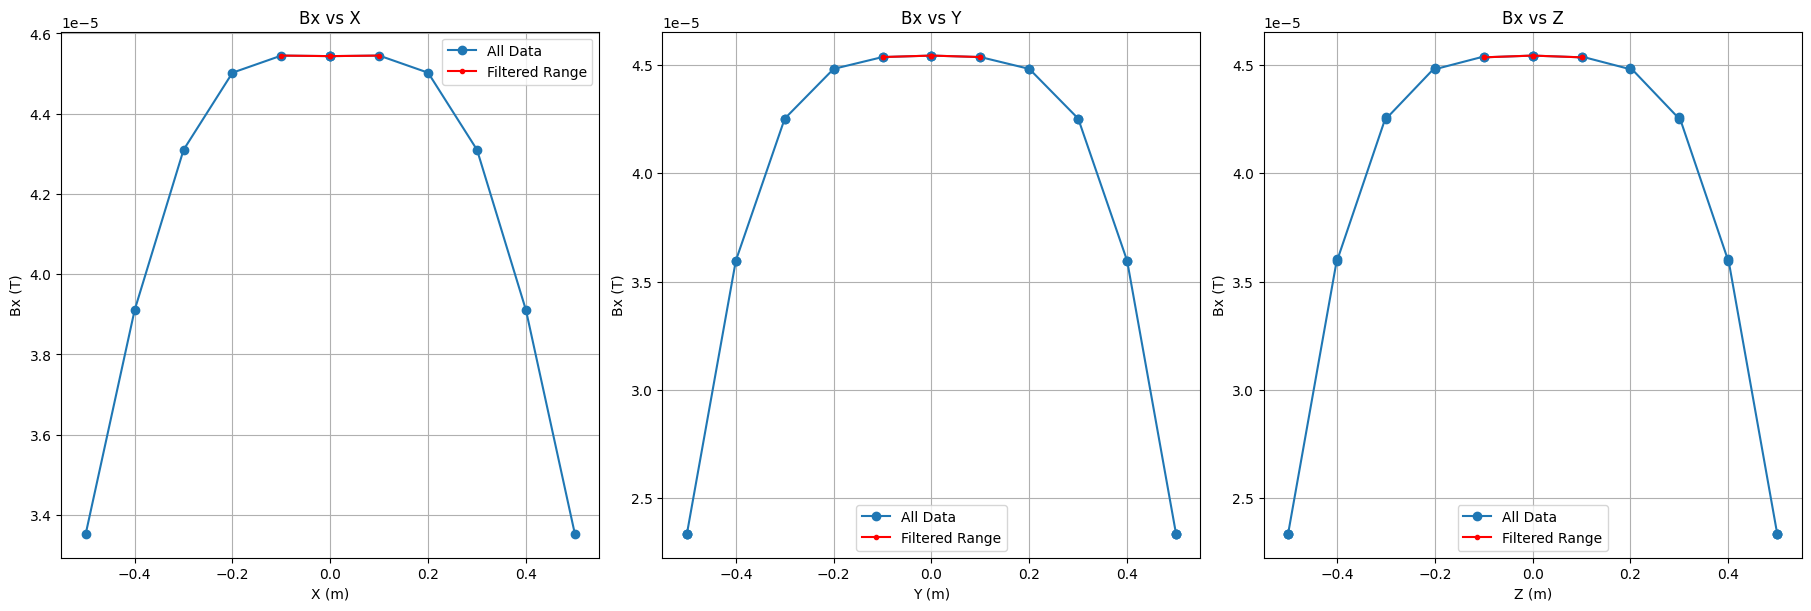

In [34]:
hplot.plot_mainAxis_field(x_coil_results_s, index='Bx')